--- First 5 Rows ---


,datetime,aqi,co,no2,o3,so2,pm2_5,pm10,nh3
0,2025-08-01 00:00:00,4,75.34,0.11,44.85,0.51,31.92,147.74,0.0
1,2025-08-01 01:00:00,4,76.23,0.10,44.87,0.51,32.07,149.80,0.0
2,2025-08-01 02:00:00,4,76.66,0.10,44.88,0.51,31.65,149.29,0.0
3,2025-08-01 03:00:00,4,76.55,0.10,44.92,0.52,30.54,144.10,0.0
4,2025-08-01 04:00:00,4,76.13,0.10,45.04,0.53,29.06,136.64,0.0



--- Basic Statistics ---


,datetime,aqi,co,no2,o3,so2,pm2_5,pm10,nh3
count,4200,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,2025-10-27 14:28:58.285714432,3.066667,179.938264,0.622112,91.527969,3.535905,37.394412,81.868331,0.275124
min,2025-08-01 00:00:00,1.000000,68.220000,0.020000,30.140000,0.060000,2.200000,5.630000,0.000000
25%,2025-09-13 17:45:00,2.000000,89.407500,0.070000,45.165000,0.280000,11.755000,36.375000,0.000000
50%,2025-10-27 11:30:00,3.000000,123.850000,0.120000,100.510000,0.560000,20.675000,69.950000,0.000000
75%,2025-12-10 05:15:00,4.000000,257.600000,1.060000,129.022500,7.112500,54.280000,109.492500,0.090000
max,2026-01-23 23:00:00,5.000000,824.500000,6.950000,208.980000,23.330000,262.000000,414.470000,4.010000
std,NaN,1.131856,125.219818,0.854506,43.345519,4.457495,37.651462,61.693810,0.626456


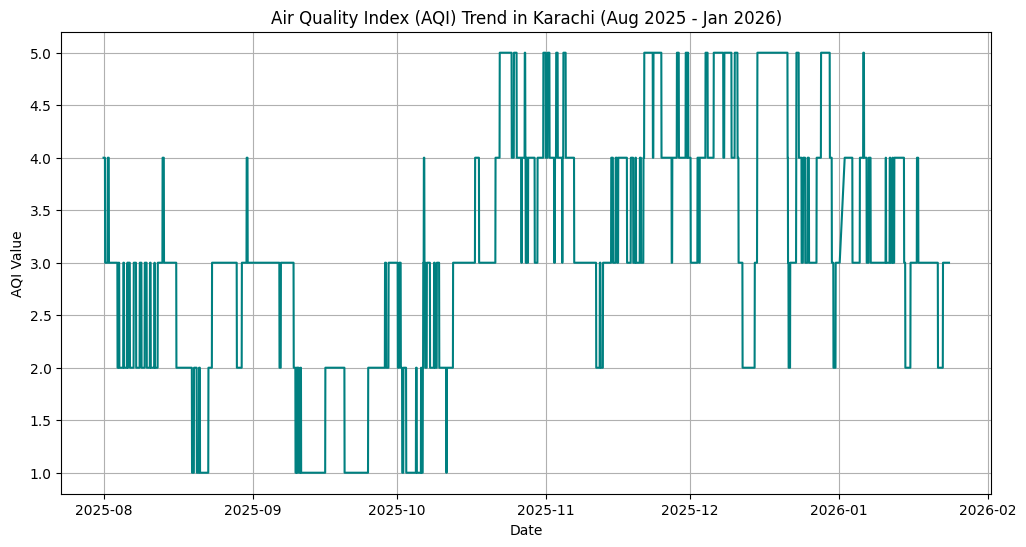

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_csv('../data/karachi_aqi_history.csv')

# 2. Convert 'datetime' column to actual dates
df['datetime'] = pd.to_datetime(df['datetime'])

# 3. Quick Look
print("--- First 5 Rows ---")
display(df.head())

print("\n--- Basic Statistics ---")
display(df.describe())

# 4. Visualization: AQI Trend over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='datetime', y='aqi', color='teal')
plt.title('Air Quality Index (AQI) Trend in Karachi (Aug 2025 - Jan 2026)')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()

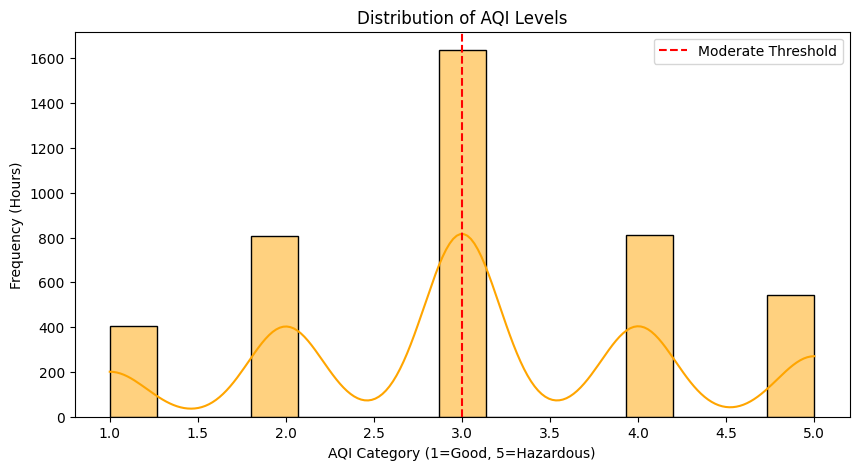

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['aqi'], bins=15, kde=True, color='orange')
plt.axvline(x=3, color='red', linestyle='--', label='Moderate Threshold')
plt.title('Distribution of AQI Levels')
plt.xlabel('AQI Category (1=Good, 5=Hazardous)')
plt.ylabel('Frequency (Hours)')
plt.legend()
plt.show()


--- New Features Added ---


,datetime,hour,day_of_week,month
0,2025-08-01 00:00:00,0,4,8
1,2025-08-01 01:00:00,1,4,8
2,2025-08-01 02:00:00,2,4,8
3,2025-08-01 03:00:00,3,4,8
4,2025-08-01 04:00:00,4,4,8


C:\Users\PMLS\AppData\Local\Temp\ipykernel_11676\357415269.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='aqi', ci=None, marker='o')


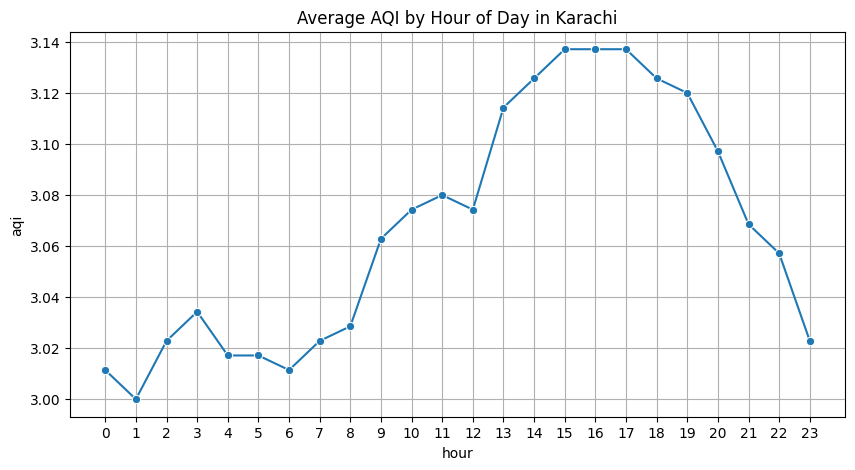

In [12]:
# 1. Extract time-based features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

# 2. Check the new columns
print("--- New Features Added ---")
display(df[['datetime', 'hour', 'day_of_week', 'month']].head())

# 3. Visualization: AQI by Hour (Diurnal Pattern)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='hour', y='aqi', ci=None, marker='o')
plt.title('Average AQI by Hour of Day in Karachi')
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()

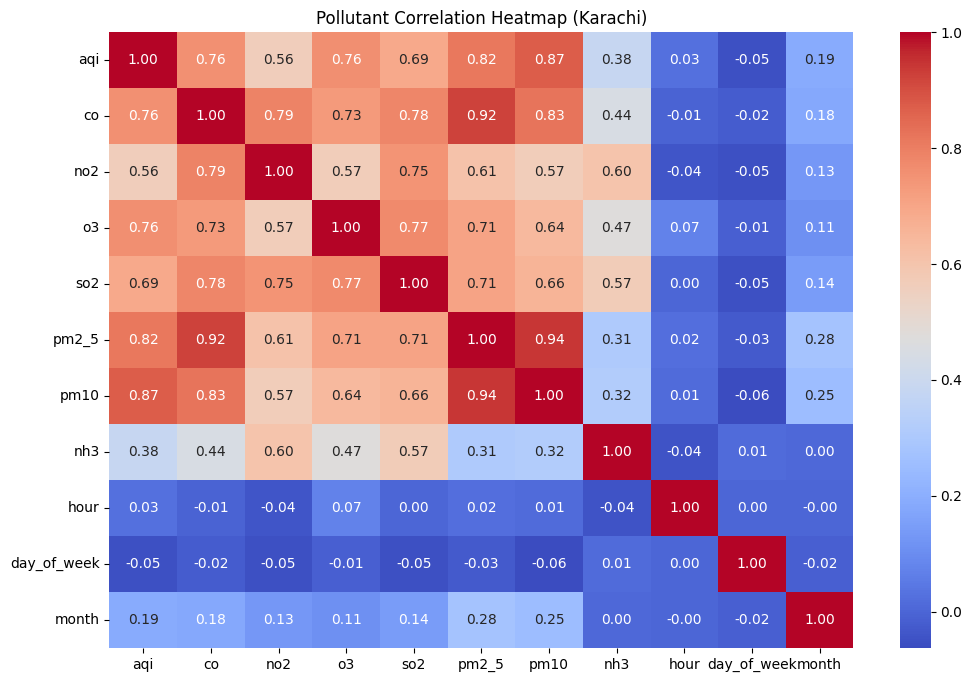

In [13]:
# 1. Calculate the correlation matrix
# We only want numeric columns for this
numeric_df = df.drop(columns=['datetime'])
correlation_matrix = numeric_df.corr()

# 2. Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pollutant Correlation Heatmap (Karachi)')

plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# 1. Define your Features (X) and your Target (y)
# We drop 'datetime' because it's not a number, and 'aqi' because that's what we want to predict
X = df.drop(columns=['aqi', 'datetime'])
y = df['aqi']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training set size: {len(X_train)} rows")
print(f"✅ Testing set size: {len(X_test)} rows")

✅ Training set size: 3360 rows
✅ Testing set size: 840 rows


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Initialize the Model
# n_estimators=100 means we are using 100 "decision trees" to vote on the result
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model (This is the "Learning" part)
model.fit(X_train, y_train)

# 3. Make predictions on the test set
predictions = model.predict(X_test)

# 4. Check how well we did
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"✅ Model Training Complete!")
print(f"📊 Mean Absolute Error: {mae:.2f}")
print(f"📈 R-Squared Score: {r2:.2f}")

✅ Model Training Complete!
📊 Mean Absolute Error: 0.01
📈 R-Squared Score: 1.00


In [16]:
# 1. Define 'Real' Features (Time and basic indicators only)
# We exclude the specific pollutants to see if the model can learn the pattern
real_features = ['hour', 'day_of_week', 'month']
X_real = df[real_features]
y_real = df['aqi']

# 2. Split again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# 3. Retrain
model_real = RandomForestRegressor(n_estimators=100, random_state=42)
model_real.fit(X_train_r, y_train_r)

# 4. Evaluate
real_preds = model_real.predict(X_test_r)
print(f"📊 Real Model MAE: {mean_absolute_error(y_test_r, real_preds):.2f}")
print(f"📈 Real Model R-Squared: {r2_score(y_test_r, real_preds):.2f}")

📊 Real Model MAE: 0.87
📈 Real Model R-Squared: 0.10


In [17]:
# 1. Create a 1-hour lag feature
# shift(1) takes the AQI from the previous row and puts it in the current row
df['aqi_lag_1h'] = df['aqi'].shift(1)

# 2. Since the first row won't have a "previous" value, it will be NaN. We must drop it.
df_lagged = df.dropna()

# 3. Define the new Features (Time + Previous Hour's AQI)
X_lag = df_lagged[['hour', 'day_of_week', 'month', 'aqi_lag_1h']]
y_lag = df_lagged['aqi']

# 4. Split and Retrain
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lag, y_lag, test_size=0.2, random_state=42)

model_lag = RandomForestRegressor(n_estimators=100, random_state=42)
model_lag.fit(X_train_l, y_train_l)

# 5. Evaluate the improvement
lag_preds = model_lag.predict(X_test_l)
print(f"📊 Lag Model MAE: {mean_absolute_error(y_test_l, lag_preds):.2f}")
print(f"📈 Lag Model R-Squared: {r2_score(y_test_l, lag_preds):.2f}")

📊 Lag Model MAE: 0.11
📈 Lag Model R-Squared: 0.94


d:\pearls-aqi-predictor\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Explaining Feature Importance with SHAP ---


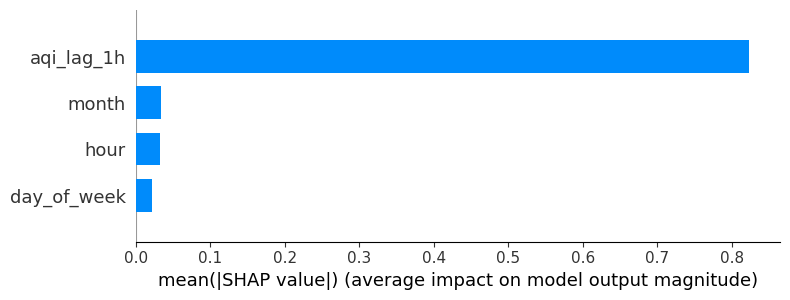

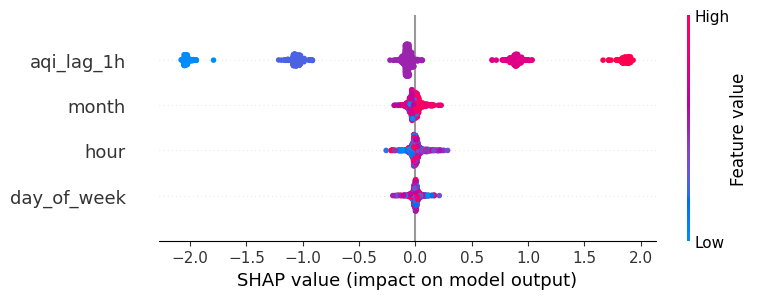

In [18]:
import shap

# 1. Initialize the SHAP Explainer
# We use TreeExplainer because it is optimized for Random Forest
explainer = shap.TreeExplainer(model_lag)
shap_values = explainer.shap_values(X_test_l)

# 2. Visualization: Summary Plot
print("--- Explaining Feature Importance with SHAP ---")
shap.summary_plot(shap_values, X_test_l, plot_type="bar")

# 3. Visualization: Detailed Impact (Beeswarm)
shap.summary_plot(shap_values, X_test_l)